In [1]:
from google.colab import files
upload_files = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_dbts = pd.read_csv('diabetes.csv')
df_dbts.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Set a random seed to ensure reproducibility, then draw a random sample of 25 observations. Calculate the mean and maximum Glucose values from this sample, and compare these statistics with those of the entire population. Use charts to visually support your comparison.

In [4]:
sns.set(style='whitegrid')

print(df_dbts.head())
print("\nColumns:", df_dbts.columns)
print("\nShape:", df_dbts.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Shape: (768, 9)


In [5]:
np.random.seed(123)
sample_df = df_dbts.sample(n=25)

smpl_mean_glucose = sample_df['Glucose'].mean()
smpl_max_glucose = sample_df['Glucose'].max()

ppl_mean_glucose = df_dbts['Glucose'].mean()
ppl_max_glucose = df_dbts['Glucose'].max()

results_interm = {
    "sample_mean": smpl_mean_glucose,
    "sample_max": smpl_max_glucose,
    "population_mean": ppl_mean_glucose,
    "population_max": ppl_max_glucose
}

print("\n--- Glucose Comparison ---")
for k, v in results_interm.items():
    print(f"{k}: {v:.2f}")




--- Glucose Comparison ---
sample_mean: 130.36
sample_max: 197.00
population_mean: 120.89
population_max: 199.00


In [6]:
pwd

'/content'

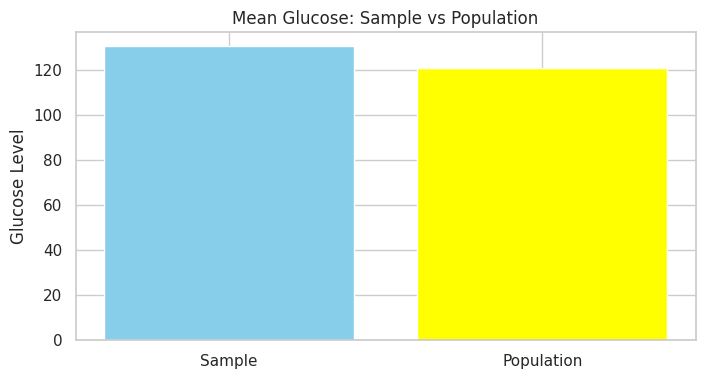

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

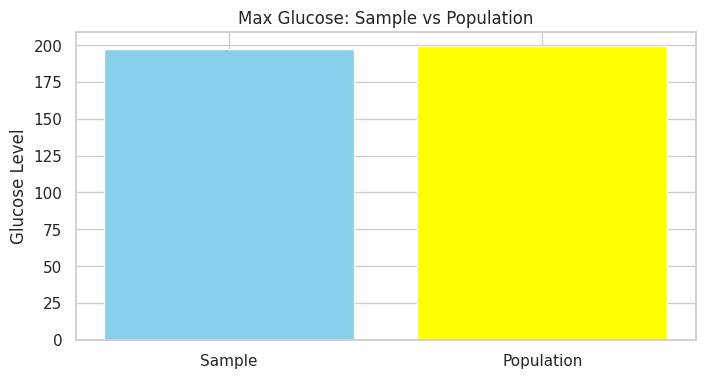

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [15]:
labels = ['Sample', 'Population']
means = [smpl_mean_glucose, ppl_mean_glucose]
maxes = [smpl_max_glucose, ppl_max_glucose]

plt.figure(figsize=(8, 4))
plt.bar(labels, means, color=['skyblue', 'yellow'])
plt.title('Mean Glucose: Sample vs Population')
plt.ylabel('Glucose Level')
plt.show()
plt.savefig("mean_glucose_comparison.png")
files.download("mean_glucose_comparison.png")

plt.figure(figsize=(8, 4))
plt.bar(labels, maxes, color=['skyblue', 'yellow'])
plt.title('Max Glucose: Sample vs Population')
plt.ylabel('Glucose Level')
plt.show()
plt.savefig("max_glucose.png")

files.download("max_glucose.png")

Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.


--- 98th Percentile of BMI ---
sample_98th_percentile: 45.26
population_98th_percentile: 47.53


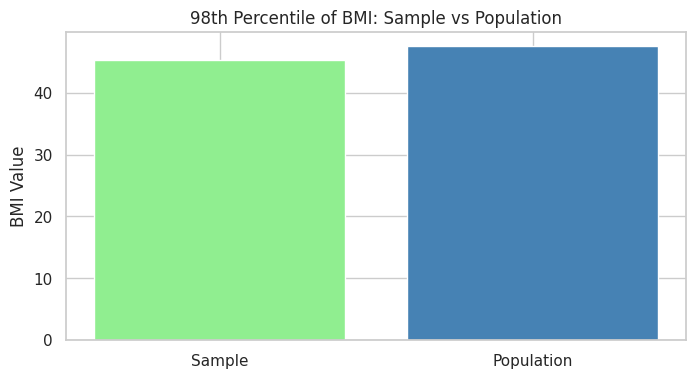

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

smpl_bmi_98 = np.percentile(sample_df['BMI'], 98)
ppl_bmi_98 = np.percentile(df_dbts['BMI'], 98)

# 💾 Save results
results_2 = {
    "sample_98th_percentile": smpl_bmi_98,
    "population_98th_percentile": ppl_bmi_98
}

print("\n--- 98th Percentile of BMI ---")
for k, v in results_2.items():
    print(f"{k}: {v:.2f}")

# 📉 Step 2: Create bar chart for comparison
labels = ['Sample', 'Population']
values = [smpl_bmi_98, ppl_bmi_98]

plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['lightgreen', 'steelblue'])
plt.title('98th Percentile of BMI: Sample vs Population')
plt.ylabel('BMI Value')
plt.savefig("bmi_98th_percentile.png")
plt.show()

files.download("bmi_98th_percentile.png")


Using bootstrapping with replacement, generate 500 samples, each containing 150 observations from the population. For each sample, calculate the mean, standard deviation, and percentiles of the BloodPressure variable. Then, compute the average of these statistics across all bootstrap samples and compare them to the corresponding statistics from the entire population. Use visualizations to illustrate this comparison and summarize your observations in a brief report.

In [10]:
np.random.seed(123)

bstrap_means = []
bstrap_stds = []
bstrap_percentiles = []

for _ in range(500):
    sample = df_dbts.sample(n=150, replace=True)
    blood_pressure = sample['BloodPressure']

    bstrap_means.append(blood_pressure.mean())
    bstrap_stds.append(blood_pressure.std())
    bstrap_percentiles.append(np.percentile(blood_pressure, 98))

avg_bstrap_mean = np.mean(bstrap_means)
avg_bstrap_std = np.mean(bstrap_stds)
avg_bstrap_percentile = np.mean(bstrap_percentiles)

ppl_mean = df_dbts['BloodPressure'].mean()
ppl_std = df_dbts['BloodPressure'].std()
ppl_percentile = np.percentile(df_dbts['BloodPressure'], 98)

results_3 = {
    "Bootstrap Mean": avg_bstrap_mean,
    "Population Mean": ppl_mean,
    "Bootstrap Std Dev": avg_bstrap_std,
    "Population Std Dev": ppl_std,
    "Bootstrap 98th Percentile": avg_bstrap_percentile,
    "Population 98th Percentile": ppl_percentile
}

print("\n--- Bootstrap vs Population (BloodPressure) ---")
for key, value in results_3.items():
    print(f"{key}: {value:.2f}")




--- Bootstrap vs Population (BloodPressure) ---
Bootstrap Mean: 69.15
Population Mean: 69.11
Bootstrap Std Dev: 19.19
Population Std Dev: 19.36
Bootstrap 98th Percentile: 98.03
Population 98th Percentile: 99.32


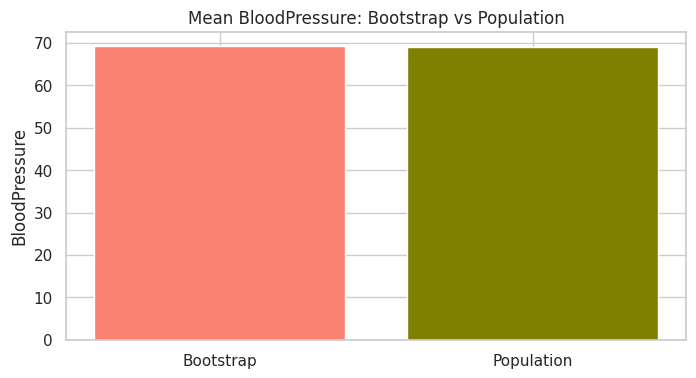

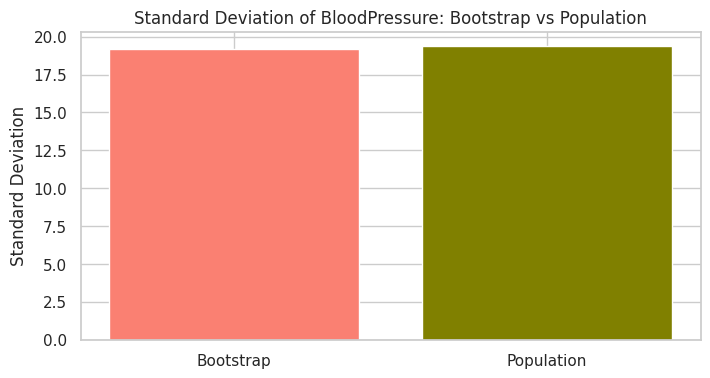

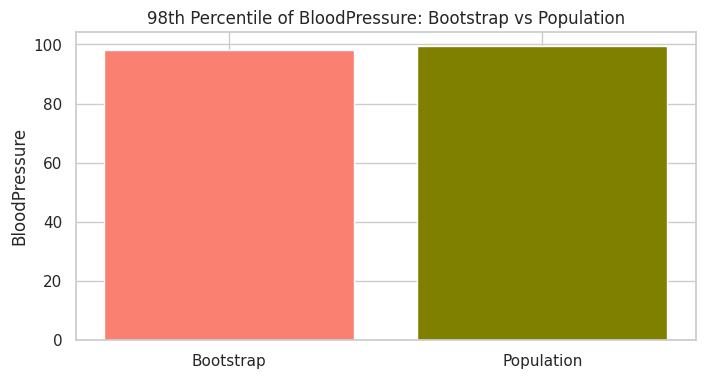

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bstrap_mean, ppl_mean], color=['salmon', 'olive'])
plt.title('Mean BloodPressure: Bootstrap vs Population')
plt.ylabel('BloodPressure')
plt.savefig("bp_mean.png")
plt.show()

# Std Dev Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bstrap_std, ppl_std], color=['salmon', 'olive'])
plt.title('Standard Deviation of BloodPressure: Bootstrap vs Population')
plt.ylabel('Standard Deviation')
plt.savefig("bp_std.png")
plt.show()

# 98th Percentile Comparison
plt.figure(figsize=(8, 4))
plt.bar(['Bootstrap', 'Population'], [avg_bstrap_percentile, ppl_percentile], color=['salmon', 'olive'])
plt.title('98th Percentile of BloodPressure: Bootstrap vs Population')
plt.ylabel('BloodPressure')
plt.savefig("bp_98th_percentile.png")
plt.show()

# ⬇️ Step 7: Download charts (optional)
from google.colab import files
files.download("bp_mean.png")
files.download("bp_std.png")
files.download("bp_98th_percentile.png")